<a href="https://colab.research.google.com/github/Go21032/object_detection_golib/blob/main/%E3%83%A2%E3%83%87%E3%83%AB%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2.0系tensorflow選択
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# 画像認識時にGPUを使ってください．
# 割り当てられたGPUの確認 「Tesla P100」が一番速くメモリも大きいGPU
# 以下はGPU種類を示す．
!nvidia-smi

Wed Mar 27 09:53:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#OS依存機能利用モジュールをインポート
import os

#ファイル操作shutilモジュールをインポート
import shutil

#学習と検証用データ数を設定(データ数量より変更必要)
num_train = 50
num_validation = 20

# choki, gu and pa picture download web: https://github.com/karaage0703/janken_dataset


# 学習データとターゲットデータのディレクトリを指定
# source_dirはデータ保存先
source_dir = "/content/drive/MyDrive/蓮ノ空CD機械学習/Hasu_data_verjpg"
# 一時用trainデータ保存先を作る．次回も使用したければ，自分のgoogle driveに保存　例えば：/content/drive/MyDrive/data/train
train_dir = "./data/train"
# 一時用validデータ保存先を作る．次回も使用したければ，自分のgoogle driveに保存　例えば：/content/drive/MyDrive/data/validation
valid_dir = "./data/validation"

#今後を使用したい場合に，以下のコードを使う
# train_dir = "/content/drive/MyDrive/data/train"
# valid_dir = "/content/drive/MyDrive/data/validation"

# choki,gu,paのデータ保存用フォルダ作成
#(他の認識時フォルダ名の変更が必要，なお，自分の分類によってフォルダを増やす)
os.makedirs("%s/HoliHoli" % train_dir)
os.makedirs("%s/lttf" % train_dir)
os.makedirs("%s/Natumeki" % train_dir)
os.makedirs("%s/Kabe" % train_dir)

os.makedirs("%s/HoliHoli" % valid_dir)
os.makedirs("%s/lttf" % valid_dir)
os.makedirs("%s/Natumeki" % valid_dir)
os.makedirs("%s/Kabe" % valid_dir)

In [ ]:
# データの分割
# 訓練データの用意 (他の認識時ファイル名の変更が必要)
for i in range(num_train):
   # shutil.copyを用いてデータを作ったフォルダにコピーし，ファイル名も変換する． ⇨ https://hibiki-press.tech/python/shutil_copy_move_rmtree/1305
   # "%s/choki_%d.JPG"と"%s/choki/choki%04d.jpg"　の書き方に留意
   #ここで，choki,gu,paの名だけがあるが，他の認識時ファイル名の変更が必要，なお，自分の分類によって増やす
   shutil.copy("%s/HoliHoli_%d.jpg" % (source_dir, i), "%s/HoliHoli/HoliHoli%04d.jpg" % (train_dir, i + 1))
   shutil.copy("%s/lttf_%d.jpg" % (source_dir, i), "%s/lttf/lttf%04d.jpg" % (train_dir, i + 1))
   shutil.copy("%s/Natumeki_%d.jpg" % (source_dir, i), "%s/Natumeki/Natumeki%04d.jpg" % (train_dir, i + 1))
   shutil.copy("%s/Kabe_%d.jpg" % (source_dir, i), "%s/Kabe/Kabe%04d.jpg" % (train_dir, i + 1))

# テストデータの用意
for i in range(num_validation):
   #ここで，choki,gu,paの名だけがあるが，他の認識時ファイル名の変更が必要，なお，自分の分類によって増やす
   shutil.copy("%s/HoliHoli_%d.jpg" % (source_dir, num_train + i), "%s/HoliHoli/HoliHoli%04d.jpg" % (valid_dir, i + 1))
   shutil.copy("%s/lttf_%d.jpg" % (source_dir, num_train + i), "%s/lttf/lttf%04d.jpg" % (valid_dir, i + 1))
   shutil.copy("%s/Natumeki_%d.jpg" % (source_dir, num_train + i), "%s/Natumeki/Natumeki%04d.jpg" % (valid_dir, i + 1))
   shutil.copy("%s/Kabe_%d.jpg" % (source_dir, num_train + i), "%s/Kabe/Kabe%04d.jpg" % (valid_dir, i + 1))

In [ ]:
# ディレクトリの構造を可視化するための'tree'というソフトをインストール
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (103 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


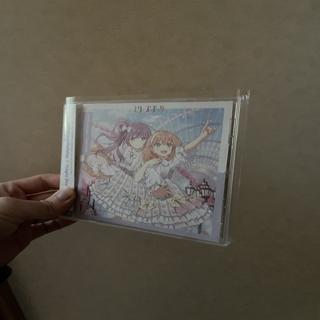

In [ ]:
# 一枚画像を表示
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('/content/data/train/HoliHoli/HoliHoli0012.jpg'))

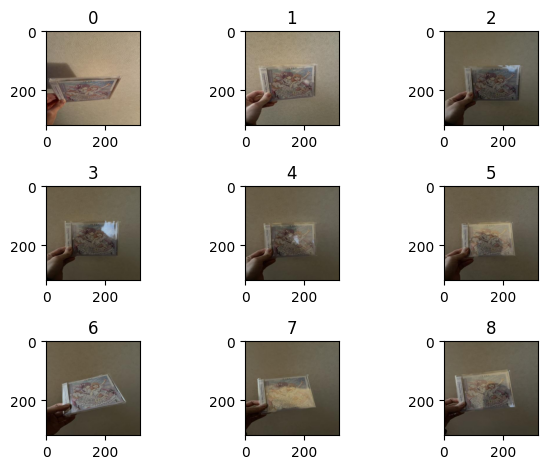

In [ ]:
# 複数枚画像を表示
# データ可視化のライブラリをインポート
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

# ImageFolderを使って，　表示画像のディレクトを指定
# 訓練ディレクトリの画像をdata_train、検証ディレクトリの画像を data_valに読み込む
#  標準コードなので，　他の認識時フォルダ名の変更が必要
data_train = datasets.ImageFolder(root="./data/train")
data_val = datasets.ImageFolder(root="./data/validation")

image_numb = 9 # 3の倍数を指定してください 表示したい画像数を指定
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(data_train[i][0]) # ここの「data_train」を表示したいディレクトリに変換

In [ ]:
# 入力データ（画像）の前処理
from keras.preprocessing.image import ImageDataGenerator

# 画像りサイズ （サイズが64pxと小さいから画像が荒くなったので320pxに変更）
img_w, img_h = 192, 192
# データのバッチのサイズの設定(8から16に変更)
batch_size = 8

# データセットの前処理(画像の水増やし)0.2から0.1に変更
train_datagen = ImageDataGenerator(rescale=1.0 / 255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.1, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# 学習データをミニバッチの数だけ生成
train_generator = train_datagen.flow_from_directory('./data/train', color_mode='rgb', target_size=(img_w, img_h), batch_size=batch_size, class_mode='categorical', shuffle=True)

# テストデータをミニバッチの数だけ生成
validation_generator = test_datagen.flow_from_directory('./data/validation', color_mode='rgb', target_size=(img_w, img_h), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
# 訓練データとテストデータのラベルの表示
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'HoliHoli': 0, 'Natumeki': 1, 'lttf': 2}
{'HoliHoli': 0, 'Natumeki': 1, 'lttf': 2}


In [ ]:
# ラベルの数の指定
NUM_CLASSES = len(train_generator.class_indices)
print("class number=" + str(NUM_CLASSES))

class number=3


In [ ]:
# 生成した学習データの中身を確認
# image_dataは画像データ，　label_dataはラベルデータ
(image_data,label_data) = train_generator.next()
print(image_data)
print(label_data)

[[[[0.3784943  0.37065116 0.31967077]
   [0.37791136 0.37006822 0.31908783]
   [0.37732846 0.36948532 0.31850493]
   ...
   [0.38431376 0.34117648 0.27058825]
   [0.38431376 0.34117648 0.27058825]
   [0.38126346 0.34270164 0.27058825]]

  [[0.38207385 0.3742307  0.32325032]
   [0.38149095 0.3736478  0.3226674 ]
   [0.38090804 0.3730649  0.32208452]
   ...
   [0.38431376 0.34117648 0.27058825]
   [0.38431376 0.34117648 0.27058825]
   [0.3801706  0.34324804 0.27058825]]

  [[0.38431376 0.37647063 0.3254902 ]
   [0.38431376 0.37647063 0.3254902 ]
   [0.38431376 0.37647063 0.3254902 ]
   ...
   [0.38431376 0.34117648 0.27058825]
   [0.38431376 0.34117648 0.27058825]
   [0.37907782 0.34379447 0.27058825]]

  ...

  [[0.25312984 0.24528667 0.19822785]
   [0.2537127  0.24586959 0.19881077]
   [0.25429565 0.2464525  0.19939367]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]]

  [[0.2509804  0.24313727 0.19607845]
   [0.2

In [ ]:
# 生成した学習データのサイズを確認
print(image_data.shape)
print(image_data.size)
print(label_data.shape)
print(label_data.size)

(8, 256, 256, 3)
1572864
(8, 3)
24


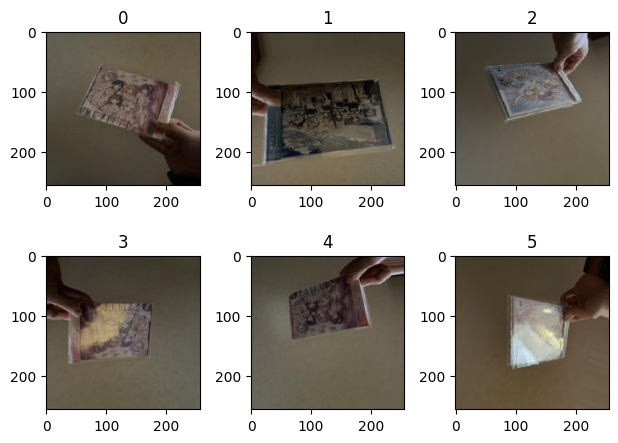

In [ ]:
# 生成した学習データ「image_data」の可視化
import matplotlib.pyplot as plt
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i]) # ここで，「image_data」指定

In [ ]:
# 学習モデルの構築

# 学習率指定0.0005から0.005と1桁挙げた
LEARNING_RATE = 0.0010
# エポック（世代数）指定
EPOCHS = 200
# バッチサイズ指定(8~16に変更)
BATCH_SIZE = 8

# 必要なライブラリをインポート
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop

#from keras.utils import np_utils  #20231217に使用できません．以下のコードを使用
from tensorflow.python.keras.utils import np_utils

In [ ]:
# モデル１(畳み込み層とプーリング層が一回)
# Seqentialモデルのインスタンス作成
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_w, img_h, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())
# 正規化　kernel_regularizer=keras.regularizers.l2(0.001)
model_1.add(Dense(312, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

#opt = RMSprop(learning_rate=LEARNING_RATE, decay=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# モデルの要約を出力
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 312)               163578168 
                                                                 
 dropout (Dropout)           (None, 312)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 939       
                                                        

In [ ]:
# モデルの実行
%%time
history_1 = model_1.fit(train_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=validation_generator)

Epoch 1/200
19/19 [==============================] - 8s 158ms/step - loss: 16.4089 - accuracy: 0.2533 - val_loss: 3.4271 - val_accuracy: 0.3333
Epoch 2/200
19/19 [==============================] - 3s 139ms/step - loss: 1.1008 - accuracy: 0.4667 - val_loss: 1.0717 - val_accuracy: 0.5500
Epoch 3/200
19/19 [==============================] - 3s 139ms/step - loss: 0.8096 - accuracy: 0.6733 - val_loss: 0.6680 - val_accuracy: 0.8000
Epoch 4/200
19/19 [==============================] - 4s 229ms/step - loss: 0.6372 - accuracy: 0.7133 - val_loss: 0.5988 - val_accuracy: 0.7833
Epoch 5/200
19/19 [==============================] - 3s 163ms/step - loss: 0.5168 - accuracy: 0.8200 - val_loss: 0.5347 - val_accuracy: 0.7000
Epoch 6/200
19/19 [==============================] - 3s 151ms/step - loss: 0.5713 - accuracy: 0.7733 - val_loss: 0.5732 - val_accuracy: 0.7333
Epoch 7/200
19/19 [==============================] - 3s 139ms/step - loss: 0.5062 - accuracy: 0.8133 - val_loss: 0.3780 - val_accuracy: 0.783

In [ ]:
# モデル2　(畳み込み層とプーリング層が四回繰り返す)
# Seqentialモデルのインスタンス作成
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_w, img_h, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())
model_2.add(Dense(312, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(NUM_CLASSES, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)       

In [ ]:
# モデル２の実行
%%time
history_2 = model_2.fit(train_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=validation_generator)

Epoch 1/200
19/19 [==============================] - 7s 172ms/step - loss: 1.1065 - accuracy: 0.3133 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 2/200
19/19 [==============================] - 4s 196ms/step - loss: 1.0769 - accuracy: 0.3867 - val_loss: 1.0965 - val_accuracy: 0.3333
Epoch 3/200
19/19 [==============================] - 3s 141ms/step - loss: 1.0877 - accuracy: 0.3533 - val_loss: 1.0132 - val_accuracy: 0.5833
Epoch 4/200
19/19 [==============================] - 3s 135ms/step - loss: 0.8714 - accuracy: 0.5600 - val_loss: 0.8447 - val_accuracy: 0.5833
Epoch 5/200
19/19 [==============================] - 4s 207ms/step - loss: 0.6550 - accuracy: 0.6600 - val_loss: 0.9346 - val_accuracy: 0.6333
Epoch 6/200
19/19 [==============================] - 2s 126ms/step - loss: 0.7416 - accuracy: 0.6933 - val_loss: 1.1178 - val_accuracy: 0.3833
Epoch 7/200
19/19 [==============================] - 2s 129ms/step - loss: 0.6649 - accuracy: 0.6667 - val_loss: 1.2338 - val_accuracy: 0.6167

In [ ]:
# モデル３
# 転移学習：あるタスク向けに学習したモデルを、類似したタスクを実行するモデルの開始点として使用するディープラーニングの手法
# メリット：　過去の経験を活かして新しい物事を習得 デメリット：　知識を移転することで精度の改善ではなく悪化をもたらす場合がある． 負の転移が起こる原因としては、転移元と転移先の関連性が低いことや、転移の方法が適していない
#　ここで，まず，学習済みのモデルEfficientNet利用　https://qiita.com/omiita/items/83643f78baabfa210ab1
# 2019年5月にGoogle Brainから発表されたモデルで、従来よりかなり少ないパラメータ数で高い精度を叩き出したState-of-The-Artなモデル
# 必要なライブラリをインポート
import tensorflow_hub as hub

# EfficientNetを読み込み
feature_extractor_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=(img_w, img_h, 3))

#転位学習のため，ベースとなる層の再学習を禁止する
feature_extractor_layer.trainable = False

# 学習層を追加する
efficientnet_model_3 = tf.keras.Sequential([feature_extractor_layer, tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')])

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
efficientnet_model_3.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])

# モデルの要約を示す
efficientnet_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_4 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4053407 (15.46 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
# 転移学習モデルの実行
%%time
history_3 = efficientnet_model_3.fit(train_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=validation_generator)

Epoch 1/200
19/19 [==============================] - 10s 264ms/step - loss: 0.9713 - accuracy: 0.5600 - val_loss: 0.8967 - val_accuracy: 0.4333
Epoch 2/200
19/19 [==============================] - 3s 175ms/step - loss: 0.6614 - accuracy: 0.8800 - val_loss: 0.6549 - val_accuracy: 0.8000
Epoch 3/200
19/19 [==============================] - 3s 157ms/step - loss: 0.4520 - accuracy: 0.9400 - val_loss: 0.5114 - val_accuracy: 0.8667
Epoch 4/200
19/19 [==============================] - 3s 133ms/step - loss: 0.3460 - accuracy: 0.9667 - val_loss: 0.5028 - val_accuracy: 0.8500
Epoch 5/200
19/19 [==============================] - 3s 134ms/step - loss: 0.2654 - accuracy: 0.9800 - val_loss: 0.3740 - val_accuracy: 0.9167
Epoch 6/200
19/19 [==============================] - 3s 132ms/step - loss: 0.2332 - accuracy: 0.9933 - val_loss: 0.3637 - val_accuracy: 0.9000
Epoch 7/200
19/19 [==============================] - 4s 210ms/step - loss: 0.1814 - accuracy: 0.9867 - val_loss: 0.2960 - val_accuracy: 0.950

In [ ]:
# モデル4
# VGG16を使う転移学習
# 必要なライブラリをインポート
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

# EarlyStopping: 過学習防止，　予測性能が下がる前に学習を打ち切る
# from keras.callbacks import EarlyStopping

## Loading VGG16 model → https://keras.io/ja/applications/#vgg16
# weights: None (ランダム初期化) か 'imagenet' (ImageNetで学習した重み) のどちらか一方
# include_top: ネットワークの出力層側にある3つの全結合層を含むかどうか
# input_shape: オプショナルなshapeのタプル 正確に3つの入力チャンネルをもつ必要があり，width と height は48以上にする必要
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_w, img_h, 3))

## Not trainable weights
#転位学習のため，ベースとなる層の再学習を禁止する
base_model.trainable = False

## Preprocessing input データ前処理しな場合に，以下のコードで前処理
# train_generator = preprocess_input(train_generator)
# validation_generator = preprocess_input(validation_generator)

VGG16_model_4 = Sequential(base_model)

VGG16_model_4.add(Flatten())
# 正規化　kernel_regularizer=keras.regularizers.l2(0.001)
VGG16_model_4.add(Dense(512, activation='relu'))
VGG16_model_4.add(Dropout(0.5))
VGG16_model_4.add(Dense(NUM_CLASSES, activation='softmax'))

#opt = RMSprop(learning_rate=LEARNING_RATE, decay=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

VGG16_model_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# EarlyStoppingの設定. ⇨ https://qiita.com/yukiB/items/f45f0f71bc9739830002
# monitor	監視値指定, patience	ループの最低数, verbose	保存時に標準出力にコメントを出すか指定．{0, 1}
# mode	上限，下限どちらの側に収束した場合に収束判定を出すかの規定．{auto, min, max}
# early_stopping =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

# モデルの要約を示す
VGG16_model_4.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 31493955 (120.14 MB)
Trainable params: 16779267 (64.01 MB)
Non-trainable params: 14714688 (56.13 MB)
______

In [ ]:
# 転移学習モデルの実行
#EarlyStoppingを使うとき，このコードを追加 , callbacks=[early_stopping]
%%time
history_4 = VGG16_model_4.fit(train_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=validation_generator)

Epoch 1/200
19/19 [==============================] - 11s 373ms/step - loss: 6.8066 - accuracy: 0.4200 - val_loss: 3.6936 - val_accuracy: 0.4500
Epoch 2/200
19/19 [==============================] - 3s 152ms/step - loss: 5.8661 - accuracy: 0.4800 - val_loss: 7.0813 - val_accuracy: 0.5333
Epoch 3/200
19/19 [==============================] - 3s 153ms/step - loss: 2.5053 - accuracy: 0.6200 - val_loss: 8.8499 - val_accuracy: 0.3667
Epoch 4/200
19/19 [==============================] - 3s 153ms/step - loss: 1.1314 - accuracy: 0.7933 - val_loss: 7.1907 - val_accuracy: 0.3833
Epoch 5/200
19/19 [==============================] - 4s 201ms/step - loss: 0.6689 - accuracy: 0.8200 - val_loss: 3.2252 - val_accuracy: 0.4833
Epoch 6/200
19/19 [==============================] - 3s 158ms/step - loss: 0.7483 - accuracy: 0.8000 - val_loss: 1.5733 - val_accuracy: 0.6500
Epoch 7/200
19/19 [==============================] - 3s 154ms/step - loss: 0.3149 - accuracy: 0.8867 - val_loss: 2.0822 - val_accuracy: 0.483

In [ ]:
# 評価の数値表示: 出来上がった人工知能モデルが、どれだけ優秀なのかを評価
#　　精度が一番高いモデルを確認
score_1 = model_1.evaluate(validation_generator, verbose=0)
score_2 = model_2.evaluate(validation_generator, verbose=0)
score_3 = efficientnet_model_3.evaluate(validation_generator, verbose=0)
score_4 = VGG16_model_4.evaluate(validation_generator, verbose=0)

# テスト結果を示す
print('(1).')
print('Model1 loss:', score_1[0])
print('Model1 accuracy:', score_1[1])
S1 = score_1[1]
print('(2).')
print('Model2 loss:', score_2[0])
print('Model2 accuracy:', score_2[1])
S2 = score_2[1]
print('(3).')
print('Model3 loss:', score_3[0])
print('Model3 accuracy:', score_3[1])
S3 = score_3[1]
print('(4).')
print('Model4 loss:', score_4[0])
print('Model4 accuracy:', score_4[1])
S4 = score_4[1]

# Best-modelを示す
#high_acc = max(score_1[1], score_2[1],score_3[1], score_4[1])
high_acc = max(score_1[1], score_2[1])
print('>>>>>')
print('The highest accuracy is:', high_acc)
print('For model_1 to model_4, ')
if S1 == high_acc:
  print('the best model is model_1')
  model = model_1
  history = history_1
elif S2 == high_acc:
  print('The best model is model_2')
  model = model_2
  history = history_2
elif S3 == high_acc:
  print('The best model is efficientnet_model_3')
  model = efficientnet_model_3
  history = history_3
elif S4 == high_acc:
  print('The best model is VGG16_model_4')
  model = VGG16_model_4
  history = history_4

(1).
Model1 loss: 1.1099129915237427
Model1 accuracy: 0.8999999761581421
(2).
Model2 loss: 2.7369980812072754
Model2 accuracy: 0.6000000238418579
(3).
Model3 loss: 0.03036792017519474
Model3 accuracy: 1.0
(4).
Model4 loss: 0.623408854007721
Model4 accuracy: 0.800000011920929
>>>>>
The highest accuracy is: 0.8999999761581421
For model_1 to model_4, 
the best model is model_1


In [ ]:
  model = model_1
  history = history_1

60/60 [==============================] - 0s 4ms/step


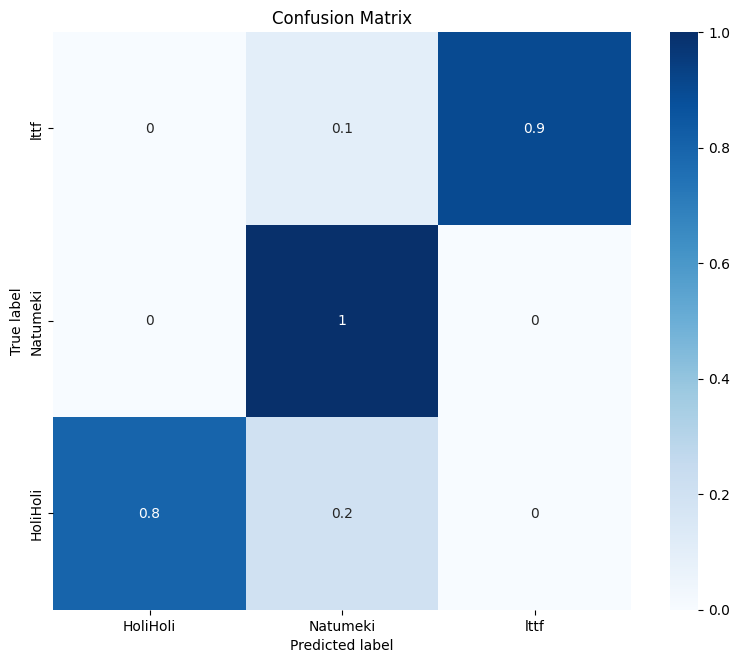

In [ ]:
# 混合行列(Confusion Matrix)を用いて評価の可視化
# 標準コードなので，　全ての「validation_generator」を評価したいテストデータのリスト名に変換すれば，評価を表示できる．ここでは，　最初定義したテストデータを評価
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_generator.reset()
validation_generator.shuffle =  False
validation_generator.batch_size = 1

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_generator:
  break

predicted = model.predict(validation_generator, steps=validation_generator.n)
predicted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(validation_generator.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7.5))

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_generator.class_indices,
            yticklabels=validation_generator.class_indices)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, NUM_CLASSES])
plt.ylim([0.0, NUM_CLASSES])
plt.show()

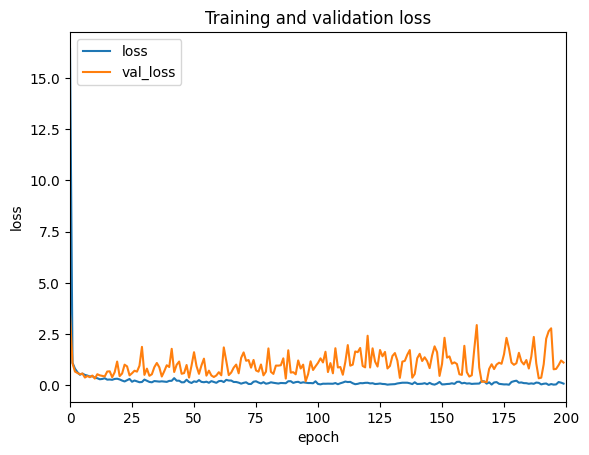

In [ ]:
#学習結果の可視化
#lossを確認する．　低いほど良い性能を示す．
# 「history.history」に最適なモデルの名前を使う．上記の計算より，　「history_3.history」を使う
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

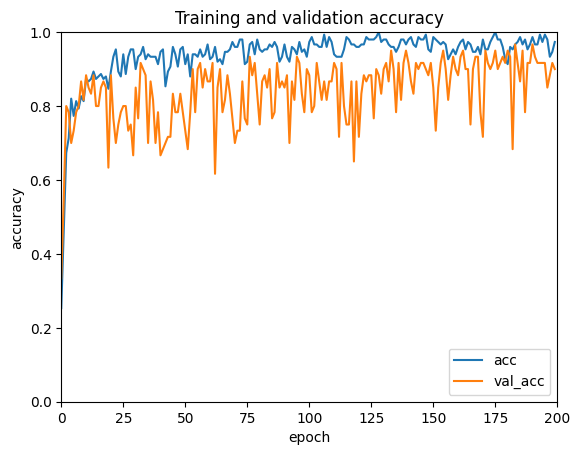

In [ ]:
# acc（精度）を確認する．
# accが訓練データでの精度で，　この値が高いほど良い性能を意味する．　例えば0.5だと50%の正解率ということになる．
# val_accというのが訓練に使っていないテストデータを使っての精度である．　いわゆる，　本当の精度と言われるものは、val_accの方となります。
# 「history.history」に最適なモデルの名前を使う．上記の計算より，　「history_3.history」を使う
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [ ]:
# Google Driveに最適なKerasのモデルを保存，「my_janken_best_model.h5」ファイル名の変更が可能
model.save('Hasu_best_model.h5')

In [ ]:
# AIモデルファイルをGoogle Driveへコピーする　「my_janken_best_model.h5」ファイル名に留意して，使用したファイル名に変更
# '/content/drive/MyDrive'　保存場所も変更可能
!cp ./Hasu_best_model.h5 '/content/drive/MyDrive/蓮ノ空CD機械学習'

In [ ]:
# 検証用データをアップロード
from google.colab import files
upload_file=files.upload()

Saving Natumeki_2.jpg to Natumeki_2.jpg


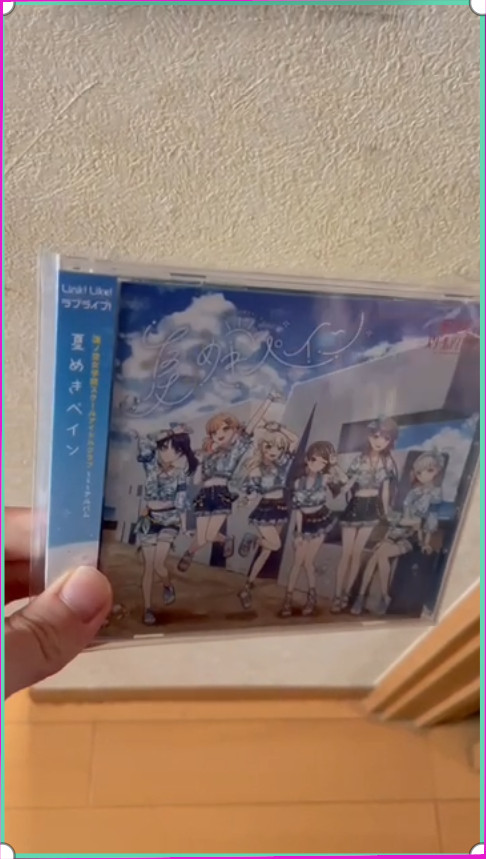

In [ ]:
# 必要なライブラリをインポート.
from IPython.display import Image as IPImage
from IPython.display import display_jpeg

# 検証データ名の定義と画像表示
testpic = next(iter(upload_file))
display_jpeg(IPImage(testpic))

In [ ]:
# 必要なライブラリをインポート
# best modelによって学習モデルを使用のコードが違うので，コード変更に注意
# time：　時間を扱うモジュール ⇨ http://ja.pymotw.com/2/time/
import keras
import sys, os
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import keras.utils as image

#from keras.utils import np_utils  #20231217に使用できません．以下のコードを使用
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.preprocessing.image import img_to_array, load_img
import time
import tensorflow_hub as hub
# VGG16に関する必要なライブラリをインポート
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

#　画像リサイズの設定
imsize = (img_w, img_h)

# 学習モデル名の定義
# next(iter(): アップロードファイル名を自動的に読み取る　または「testpic = "./dog1.jpeg"」でファイル名定義する
# 学習したモデル名を確認
keras_param = "./Hasu_best_model.h5"

#テスト画像の処理
img = image.load_img(testpic, target_size=(img_w, img_h))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

# 学習モデルを使用, best modelはefficientnet_model_3である時に，「custom_objects」を追加する必要
model_test = load_model(keras_param, custom_objects={'KerasLayer':hub.KerasLayer})

#　best modelは自分が作ったモデルまたはVGG16_model_4である時に，以下のコードを使う
#model_test = load_model(keras_param)

# 入力サンプルに対する予測の出力を生成
prd = model_test.predict(img)

# 精度の表示
print("The test picture predicted resul is:", prd)

prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> HoliHoli:", prelabel)
elif prelabel == 1:
    print(">>> Natumeki:", prelabel)
elif prelabel == 2:
    print(">>> lttf:", prelabel)

1/1 [==============================] - 0s 138ms/step
The test picture predicted resul is: [[5.9496175e-19 1.0000000e+00 1.2416062e-34]]
>>> Natumeki: [1]
